# <font color='blue'> Soft Electronics Insight Engine (SEIE)

*********************************************

#  <font color='red'> Outline: 1. Defining Problem, 2. Features, 3. Regression Models, 4 Classification

#  <font color='blue'> 1. Defining problem

#  <font color='green'> a. Read file, b. Dataframe info, c. Missing values

In [1]:
import pandas as pd

df = pd.read_csv('../input/ofet22csv/ofet - Sheet1.csv')

df.head()

,id,mu,mw/k,lumo,homo,Eg,conjg len,fused len,side alky,side conj,xtal T,Additive Type,osc%,Vert. Phase,Unnamed: 14,ref,formula,Other,Unnamed: 18
0,1,1.0,48.0,-3.25,-5.22,1.97,5.0,2.0,18.0,0.0,25.0,0.0,100.0,0.0,NaN,1.0,fdpp-f,spin coat,NaN
1,2,0.1,50.0,-3.31,-5.20,1.89,5.0,2.0,18.0,0.0,25.0,0.0,100.0,0.0,NaN,1.0,fdpp-t,NaN,NaN
2,3,0.2,63.0,-3.32,-5.21,1.89,5.0,2.0,18.0,0.0,25.0,0.0,100.0,0.0,NaN,1.0,fdpp-se,NaN,NaN
3,4,0.5,55.0,-3.26,-5.10,1.84,5.0,2.0,18.0,0.0,25.0,0.0,100.0,0.0,NaN,1.0,tdpp-f,NaN,NaN
4,5,2.5,51.0,-3.20,-5.20,2.00,5.0,2.0,18.0,0.0,25.0,0.0,100.0,0.0,NaN,1.0,tdpp-t,NaN,NaN



#vertical phase: categorical, 0 for lateral phase, 1 for vertical phase, 2 for single crystal

#additive type: categorical, 0 for no additive, 1 for insulating additive, 2 for conjugated additive

In [2]:
df.shape

(341, 19)

In [3]:
df.info

<bound method DataFrame.info of       id    mu   mw/k  lumo  homo    Eg  conjg len  fused len  side alky  \
0      1  1.00  48.00 -3.25 -5.22  1.97        5.0        2.0       18.0   
1      2  0.10  50.00 -3.31 -5.20  1.89        5.0        2.0       18.0   
2      3  0.20  63.00 -3.32 -5.21  1.89        5.0        2.0       18.0   
3      4  0.50  55.00 -3.26 -5.10  1.84        5.0        2.0       18.0   
4      5  2.50  51.00 -3.20 -5.20  2.00        5.0        2.0       18.0   
..   ...   ...    ...   ...   ...   ...        ...        ...        ...   
336  337  1.20   0.60 -3.05 -5.35  2.30        5.0        5.0        6.0   
337  338  0.04    NaN   NaN   NaN   NaN        NaN        NaN        NaN   
338  339  0.70   0.64 -3.30 -5.20  1.90        5.0        5.0        9.0   
339  340  0.50   0.64 -3.30 -5.20  1.90        5.0        5.0        9.0   
340  341   NaN    NaN -3.60 -5.57   NaN        NaN        NaN        NaN   

     side conj  xtal T  Additive Type   osc%  Vert. Pha

In [4]:
df.describe()

,id,mu,mw/k,lumo,homo,Eg,conjg len,fused len,side alky,side conj,xtal T,Additive Type,osc%,Vert. Phase,Unnamed: 14,ref
count,341.000000,339.000000,171.000000,141.000000,147.000000,152.000000,234.000000,234.000000,228.000000,234.000000,339.000000,339.000000,340.000000,340.000000,0.0,281.000000
mean,171.000000,2.972529,14.737135,-3.129504,-5.188095,2.074605,4.935897,3.662393,7.445175,0.461538,30.044248,0.218289,92.248824,0.247059,NaN,10.291103
std,98.582453,6.524360,23.084834,0.379769,0.152972,0.409491,1.313578,1.514351,8.165972,0.898625,31.600518,0.652366,21.607392,0.612666,NaN,4.898093
min,1.000000,0.000050,0.180000,-3.930000,-6.100000,1.230000,1.000000,1.000000,0.000000,0.000000,25.000000,0.000000,3.000000,0.000000,NaN,1.000000
25%,86.000000,0.095500,0.280000,-3.300000,-5.200000,1.897500,4.000000,2.000000,0.000000,0.000000,25.000000,0.000000,100.000000,0.000000,NaN,6.000000
50%,171.000000,0.500000,0.640000,-3.100000,-5.120000,2.100000,5.000000,4.000000,6.000000,0.000000,25.000000,0.000000,100.000000,0.000000,NaN,14.000000
75%,256.000000,2.050000,20.000000,-2.900000,-5.100000,2.200000,5.000000,5.000000,16.000000,1.000000,25.000000,0.000000,100.000000,0.000000,NaN,14.100000
max,341.000000,50.000000,110.000000,-1.700000,-5.000000,3.800000,10.000000,7.000000,32.000000,4.000000,480.000000,3.000000,100.000000,2.000000,NaN,14.300000


In [5]:
df=df[['mu','mw/k','lumo','homo','Eg','conjg len','fused len','side alky','side conj','xtal T','Additive Type','osc%','Vert. Phase']]

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px # for visualization
missing=(df.isnull().mean().sort_values(ascending=False)*100).reset_index()
missing.rename(columns={0:"Average"},inplace=True)
missing.head()
fig=px.histogram(missing,x="Average",y="index",title="<b>% of Missing values",color="index",labels={"Average":"% of missing values","index":"Column Names"})
fig.update_layout(
    font_color="white",
    font_size=12,
    title_font_color="cyan",
    legend_title_font_color="white",
    legend_title_font_size=20,
    template="plotly_dark",
    title_font_size=30)
fig.update_layout(xaxis_title = "<b>Amount %",xaxis_title_font_size=20,
                  yaxis_title="<b>Column-Name",yaxis_title_font_size=20,title_x=0.5)
fig.show()
fig=px.imshow(df.isnull().T,color_continuous_scale=px.colors.sequential.Electric,title="<b>Missing values in our data",)
fig.update_layout(template="plotly_dark",title_font_size=30,title_x=0.5)
#fig.show()

#  <font color='blue'> 2. Features

#  <font color='green'> a.Numericals, b.Categoricals, c.Breakdown, d.Correlation, e.Outliers

In [7]:
numerical_cols=['mw/k','lumo','homo','Eg','conjg len','fused len','side alky','side conj','xtal T','osc%']
numerical_cols

['mw/k',
 'lumo',
 'homo',
 'Eg',
 'conjg len',
 'fused len',
 'side alky',
 'side conj',
 'xtal T',
 'osc%']

In [8]:
categorical_cols=['Additive Type','Vert. Phase']
categorical_cols

['Additive Type', 'Vert. Phase']

In [9]:
for feature in categorical_cols:
     if feature not in ['']:
        fig=px.histogram(df,x=feature,facet_col="Vert. Phase",color="Vert. Phase",color_discrete_sequence=px.colors.qualitative.Alphabet_r)
        fig.update_layout(title="<b>"+feature+" vs Vert. Phase", title_font_size=30,
                             font_size=12,
                             title_x=0.5,
                             hoverlabel_font_size=15,template="plotly_dark")
        fig.show()

In [10]:
for feature in numerical_cols:
    fig=px.violin(df,x=feature,color="Vert. Phase",title="<b>"+feature+" Distribution",template="plotly_dark" )
    fig.update_layout(hovermode='x',title_font_size=30)
    fig.update_layout(
    title_font_color="#ffff00",
    template="plotly_dark",
    title_font_size=30,
    hoverlabel_font_size=20,
    title_x=0.5)
    fig.show()
    fig=px.histogram(df,x=feature,title="<b>"+feature+" Vs Vert. Phase",color="Vert. Phase",template="plotly_dark")
    fig.update_layout(hovermode='x',title_font_size=30)
    fig.update_layout(
    title_font_color="#ffff00",
    template="plotly_dark",
    title_font_size=30,
    hoverlabel_font_size=20,
    title_x=0.5)
    fig.show()

In [11]:
px.scatter_matrix(df[numerical_cols+["Vert. Phase"]],height=800,color="Vert. Phase")

In [12]:
for feature in categorical_cols:
    if feature not in['']:

        df1=df[feature].value_counts().reset_index()
        
        fig=px.pie(df1,values=df1.columns[1],names=df1.columns[0],
                   labels={"index":"<b>"+feature,feature:"Count"},
                  color_discrete_sequence=px.colors.qualitative.Pastel)

        fig.update_layout(title="<b>"+feature, title_font_size=30,
                         font_size=20,
                         title_x=0.5,legend_bordercolor="#000",legend_borderwidth=2,
                         hoverlabel_font_size=20)
        fig.update_traces(marker=dict( line=dict(color='#000000', width=2)))              
        fig.show()

In [13]:
df.columns

Index(['mu', 'mw/k', 'lumo', 'homo', 'Eg', 'conjg len', 'fused len',
       'side alky', 'side conj', 'xtal T', 'Additive Type', 'osc%',
       'Vert. Phase'],
      dtype='object')

In [14]:
Eg=df['Eg'].fillna(df['Eg'].mean())
conjg_len=df['conjg len'].fillna(df['conjg len'].mean())
fused_len=df['fused len'].fillna(df['fused len'].mean())
side_alky=df['side alky'].fillna(df['side alky'].mean())
side_conj=df['side conj'].fillna(df['side conj'].mean())
xtal_T=df['xtal T'].fillna(df['xtal T'].mean())
osc_pct=df['osc%'].fillna(df['osc%'].mean())
mu=df['mu']
mu

0      1.00
1      0.10
2      0.20
3      0.50
4      2.50
       ... 
336    1.20
337    0.04
338    0.70
339    0.50
340     NaN
Name: mu, Length: 341, dtype: float64

In [15]:
homo=df['homo'].fillna(df['homo'].mean())
homo

0     -5.220000
1     -5.200000
2     -5.210000
3     -5.100000
4     -5.200000
         ...   
336   -5.350000
337   -5.188095
338   -5.200000
339   -5.200000
340   -5.570000
Name: homo, Length: 341, dtype: float64

In [16]:
lumo=df['lumo'].fillna(df['lumo'].mean())
lumo

0     -3.250000
1     -3.310000
2     -3.320000
3     -3.260000
4     -3.200000
         ...   
336   -3.050000
337   -3.129504
338   -3.300000
339   -3.300000
340   -3.600000
Name: lumo, Length: 341, dtype: float64

In [17]:
mw=df['mw/k'].fillna(df['mw/k'].mean())
mw

0      48.000000
1      50.000000
2      63.000000
3      55.000000
4      51.000000
         ...    
336     0.600000
337    14.737135
338     0.640000
339     0.640000
340    14.737135
Name: mw/k, Length: 341, dtype: float64

# <font color='red'> New Feature: Rsc= side alky/ conjg len

In [18]:
df['Rsc']=df['side alky']/df['conjg len']
Rsc=df['Rsc'].fillna(df['Rsc'].mean())

Rsc

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      3.600000
1      3.600000
2      3.600000
3      3.600000
4      3.600000
         ...   
336    1.200000
337    1.611978
338    1.800000
339    1.800000
340    1.611978
Name: Rsc, Length: 341, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



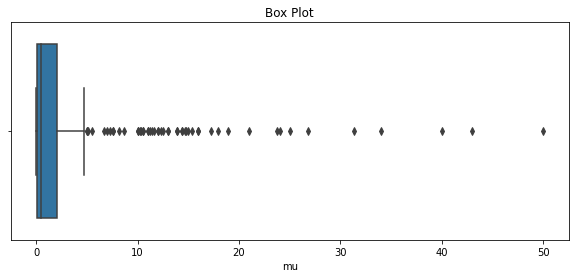

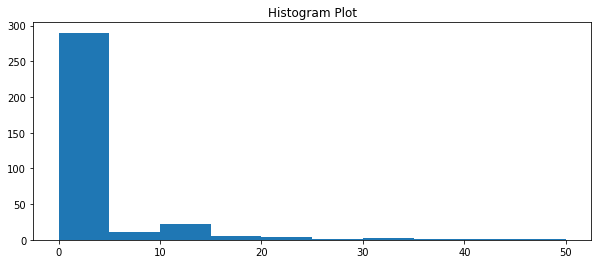

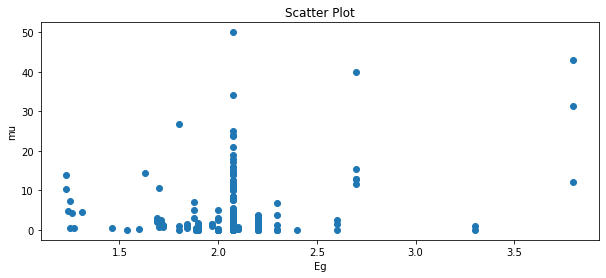

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



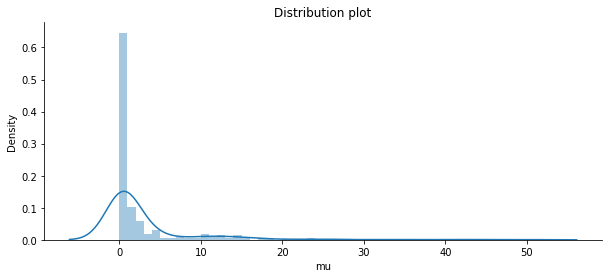

<Figure size 720x288 with 0 Axes>

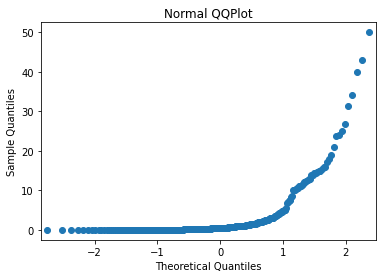

In [19]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
Box_plots(mu)

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
hist_plots(mu)

def scatter_plots(df1,df2):
    fig, ax = plt.subplots(figsize=(10,4))
    ax.scatter(df1,df2)
    ax.set_xlabel('Eg')
    ax.set_ylabel('mu')
    plt.title("Scatter Plot")
    plt.show()
scatter_plots(Eg,mu)

def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()
dist_plots(mu)

def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
qq_plots(mu)

In [20]:
df.dropna(subset=['mu'], inplace=True)
df

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mu,mw/k,lumo,homo,Eg,conjg len,fused len,side alky,side conj,xtal T,Additive Type,osc%,Vert. Phase,Rsc
0,1.000,48.00,-3.25,-5.22,1.97,5.0,2.0,18.0,0.0,25.0,0.0,100.0,0.0,3.6
1,0.100,50.00,-3.31,-5.20,1.89,5.0,2.0,18.0,0.0,25.0,0.0,100.0,0.0,3.6
2,0.200,63.00,-3.32,-5.21,1.89,5.0,2.0,18.0,0.0,25.0,0.0,100.0,0.0,3.6
3,0.500,55.00,-3.26,-5.10,1.84,5.0,2.0,18.0,0.0,25.0,0.0,100.0,0.0,3.6
4,2.500,51.00,-3.20,-5.20,2.00,5.0,2.0,18.0,0.0,25.0,0.0,100.0,0.0,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,0.094,0.60,-3.05,-5.35,2.30,5.0,5.0,6.0,1.0,25.0,1.0,50.0,1.0,1.2
336,1.200,0.60,-3.05,-5.35,2.30,5.0,5.0,6.0,1.0,25.0,1.0,50.0,1.0,1.2
337,0.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,1.0,70.0,1.0,NaN
338,0.700,0.64,-3.30,-5.20,1.90,5.0,5.0,9.0,1.0,25.0,1.0,50.0,1.0,1.8


In [21]:
train_raw = df[0:280].reset_index(drop=True)
test_raw = df[280:339].reset_index(drop=True)
test_raw.shape

(59, 14)

In [22]:
train = pd.DataFrame(columns = ['mu', 'mw/k','lumo','homo','Eg','conjg len','fused len',
       'side alky', 'side conj', 'xtal T', 'Additive Type', 'osc%','Rsc',
       'Vert. Phase'])
train.head()

,mu,mw/k,lumo,homo,Eg,conjg len,fused len,side alky,side conj,xtal T,Additive Type,osc%,Rsc,Vert. Phase


In [23]:
train['mu'] = train_raw['mu']
train['mw/k'] = train_raw['mw/k']
train['lumo'] = train_raw['lumo']
train['homo'] = train_raw['homo']
train['Eg'] = train_raw['Eg']
train['conjg len'] = train_raw['conjg len']
train['fused len'] = train_raw['fused len']
train['side alky'] = train_raw['side alky']
train['side conj'] = train_raw['side conj']
train['xtal T'] = train_raw['xtal T']
train['Additive Type'] = train_raw['Additive Type']
train['osc%'] = train_raw['osc%']
train['Rsc'] = train_raw['Rsc']

train['Vert. Phase']=train_raw['Vert. Phase']
train.head()

,mu,mw/k,lumo,homo,Eg,conjg len,fused len,side alky,side conj,xtal T,Additive Type,osc%,Rsc,Vert. Phase
0,1.0,48.0,-3.25,-5.22,1.97,5.0,2.0,18.0,0.0,25.0,0.0,100.0,3.6,0.0
1,0.1,50.0,-3.31,-5.20,1.89,5.0,2.0,18.0,0.0,25.0,0.0,100.0,3.6,0.0
2,0.2,63.0,-3.32,-5.21,1.89,5.0,2.0,18.0,0.0,25.0,0.0,100.0,3.6,0.0
3,0.5,55.0,-3.26,-5.10,1.84,5.0,2.0,18.0,0.0,25.0,0.0,100.0,3.6,0.0
4,2.5,51.0,-3.20,-5.20,2.00,5.0,2.0,18.0,0.0,25.0,0.0,100.0,3.6,0.0


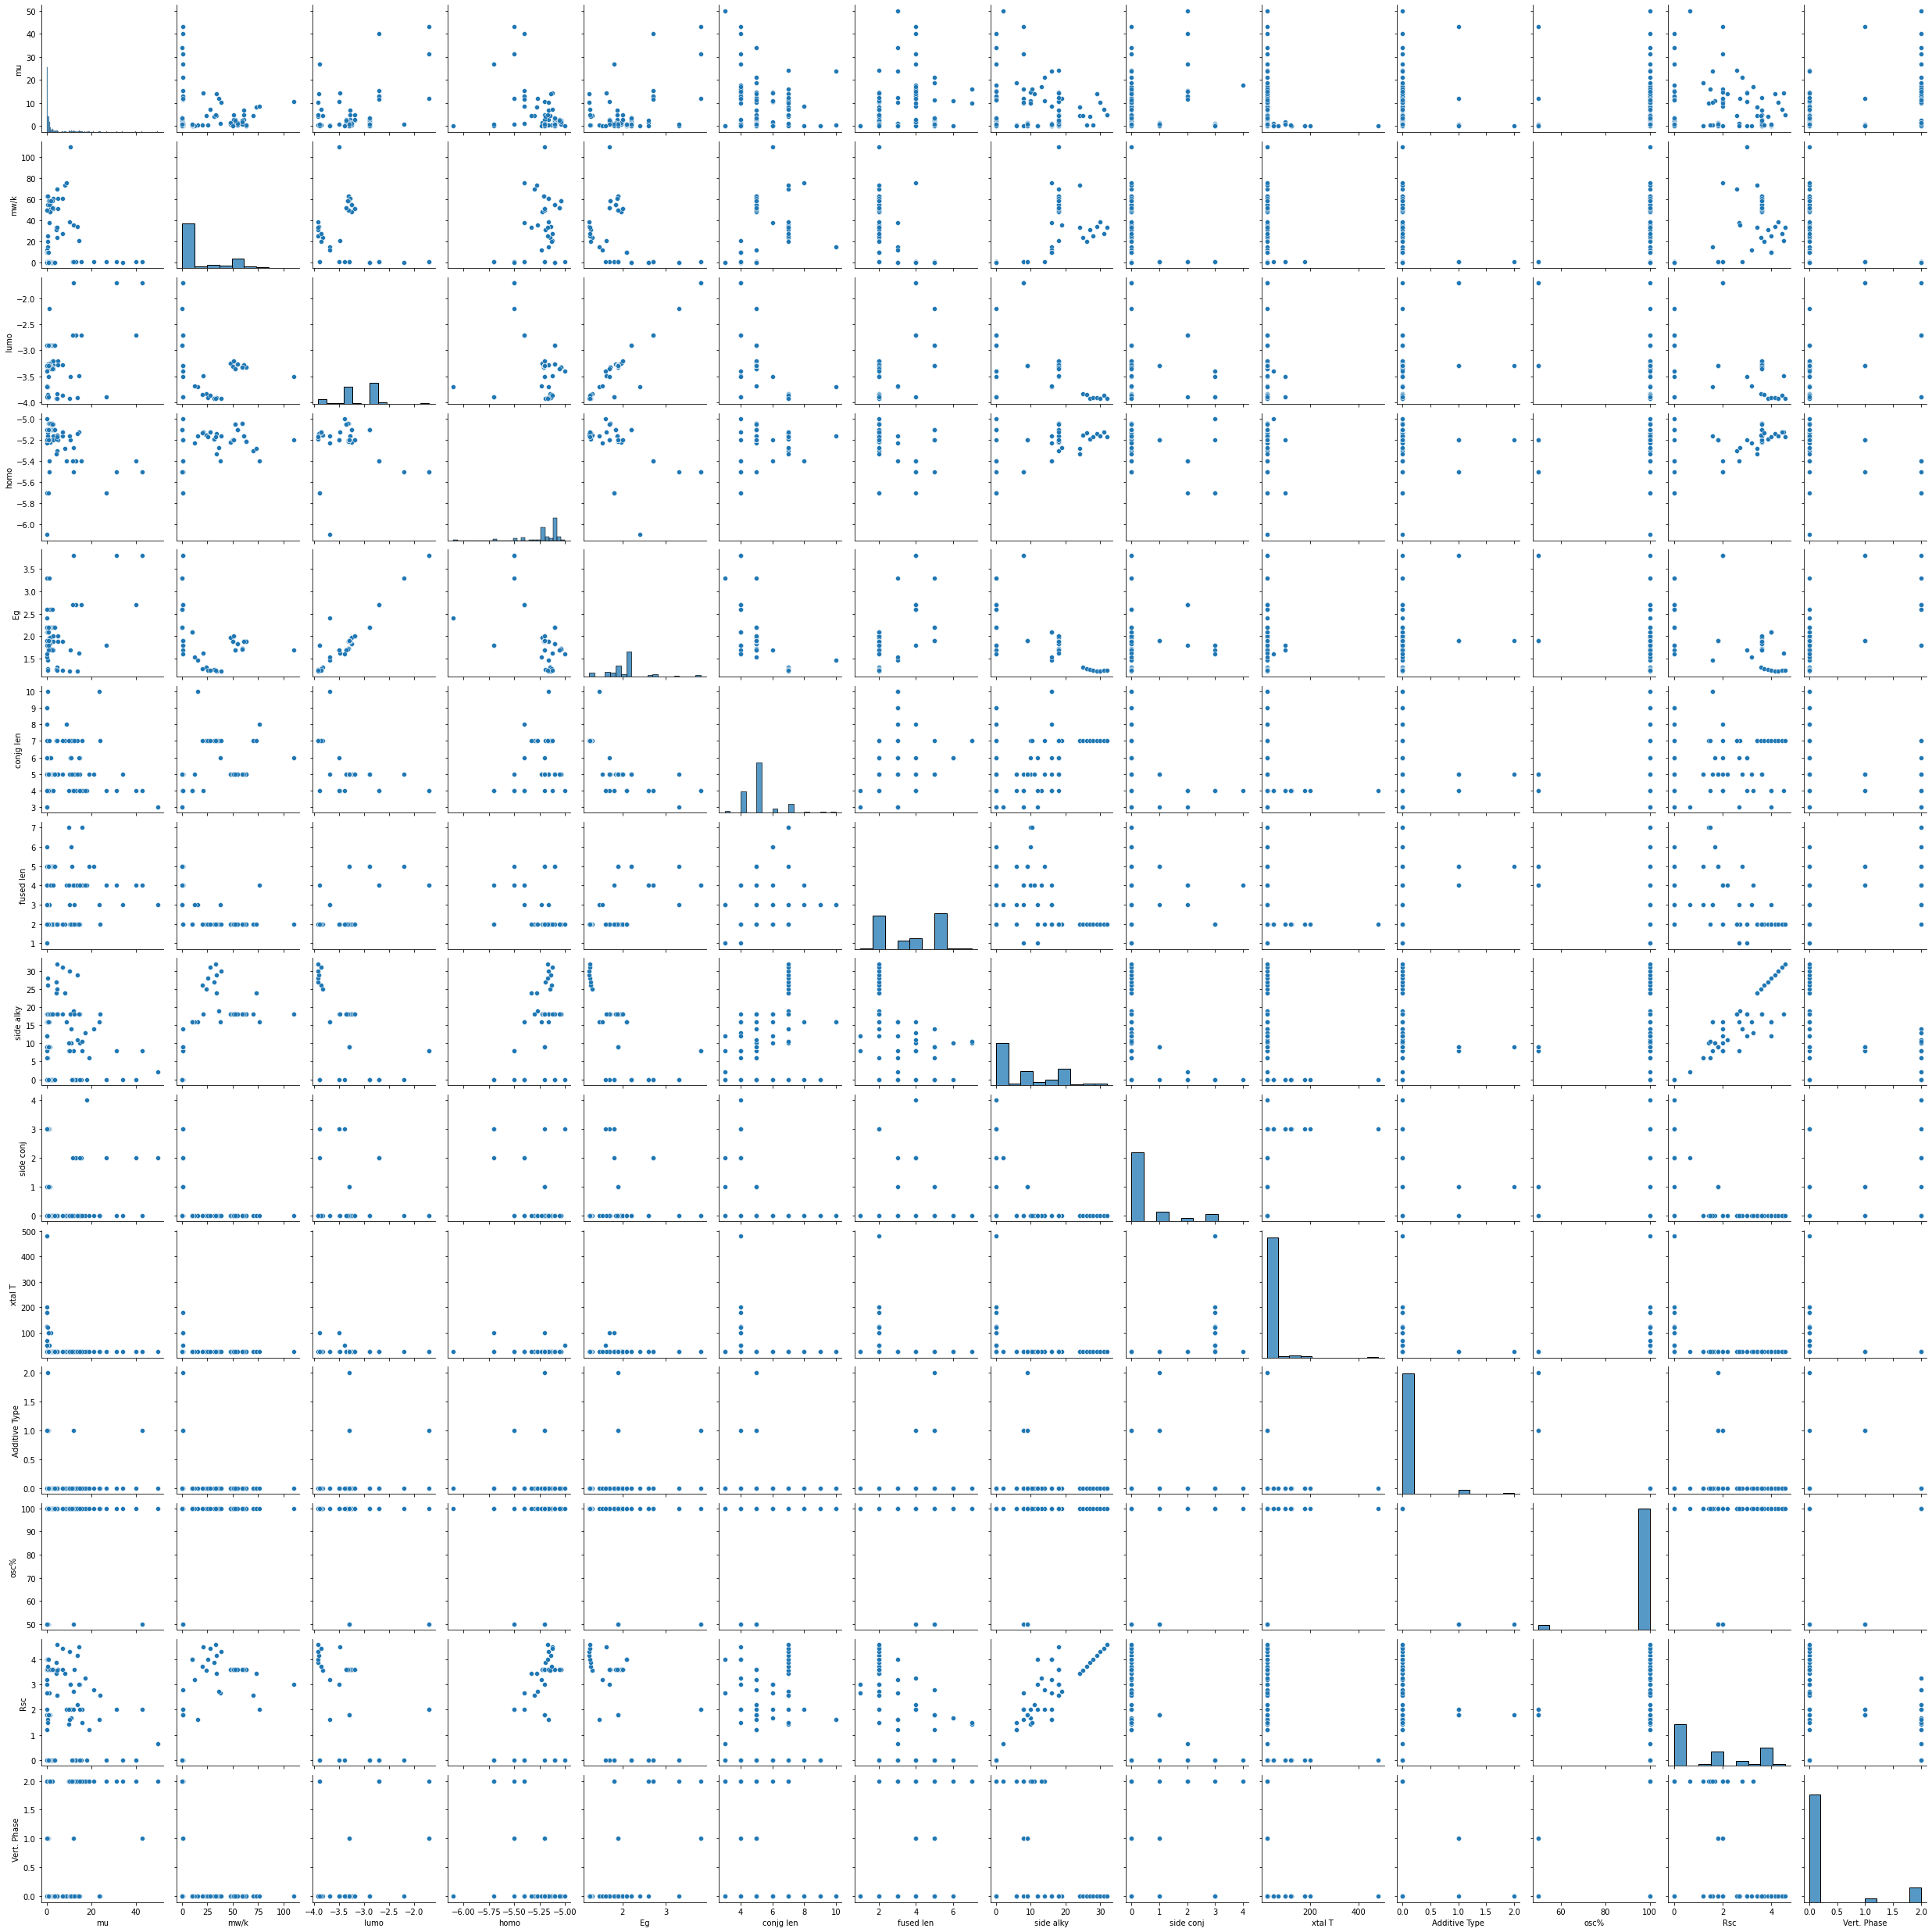

In [24]:
import matplotlib.pyplot as mp
import seaborn as sns
sns.pairplot(train)

fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True, linewidths=.5, ax=ax)

<AxesSubplot:>

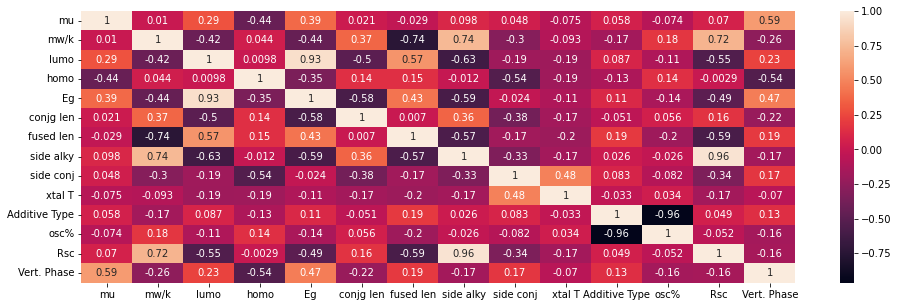

In [26]:
plt.figure(figsize=(16,5)) 
sns.heatmap(train.corr(), annot=True)

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

In [27]:
np.triu(np.ones_like(train.corr()))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

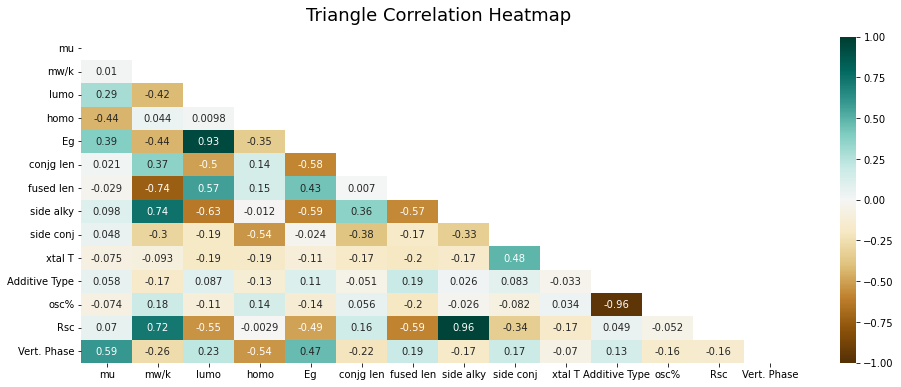

In [28]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(train.corr(), dtype=bool))
heatmap = sns.heatmap(train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

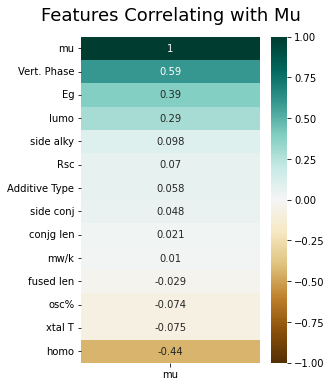

In [29]:
train.corr()[['mu']].sort_values(by='mu', ascending=False)
plt.figure(figsize=(4,6))
heatmap = sns.heatmap(train.corr()[['mu']].sort_values(by='mu', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Mu', fontdict={'fontsize':18}, pad=16);

#  <font color='blue'> 3. Regression Models

#  <font color='green'> a.Transformers, b.Linear/Polynomial, c.Tree Models, d.Others

In [30]:
#Numerical transformation performed earlier to visualize dataframes. 
#Time transformation: n/a
#Categorical transformation: labelencoder or ordinal encoder

from sklearn.preprocessing import LabelEncoder

In [31]:
Vert_Phase=df['Vert. Phase']

class newLabelEncoder():
    
    def fit(self, X, y=None):
        return super().fit(X)
    
    def transform(self, X, y=None):
        return pd.DataFrame({'label': super().transform(X)})
    
    def fit_transform(self, X, y=None):
        return pd.DataFrame({'label': super().fit_transform(X)})
    
le = LabelEncoder()
df['Vert_Phase_encoder'] = le.fit_transform(Vert_Phase)
df['Vert_Phase_encoder']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      0
1      0
2      0
3      0
4      0
      ..
335    1
336    1
337    1
338    1
339    1
Name: Vert_Phase_encoder, Length: 339, dtype: int64

In [32]:
Additive_Type= df['Additive Type']
le = LabelEncoder()
df['Additive_Type_encoder'] = le.fit_transform(Additive_Type)
df['Additive_Type_encoder']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0      0
1      0
2      0
3      0
4      0
      ..
335    1
336    1
337    1
338    1
339    1
Name: Additive_Type_encoder, Length: 339, dtype: int64

[https://www.kaggle.com/jakejhc/team-a/edit](http://)

# df_new for Modeling

In [33]:
df_new = pd.DataFrame()
df_new['mu'] = df.mu

In [34]:
#Features:
df_new['mw/k'] =mw

#df_new['lumo'] = df.lumo
#df_new['homo'] = df.homo
df_new['Eg'] = Eg
#df_new['conjg len'] = df['conjg len']
df_new['fused len'] = fused_len
#df_new['side alky'] = df['side alky']
df_new['side conj'] = side_conj
df_new['xtal T'] = xtal_T
df_new['osc%'] = osc_pct
df_new['Vert_Phase_encoder'] = df.Vert_Phase_encoder
df_new['Additive_Type_encoder'] = df['Additive_Type_encoder']
df_new['Rsc'] = side_alky/conjg_len

df_new.describe()
#df_new.isnull().sum()

,mu,mw/k,Eg,fused len,side conj,xtal T,osc%,Vert_Phase_encoder,Additive_Type_encoder,Rsc
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,2.972529,14.778719,2.074605,3.658447,0.459950,30.059128,92.225959,0.247788,0.230088,1.575963
std,6.524360,16.353646,0.273700,1.255208,0.745525,31.599323,21.635212,0.613424,0.683822,1.431189
min,0.000050,0.180000,1.230000,1.000000,0.000000,25.000000,3.000000,0.000000,0.000000,0.000000
25%,0.095500,0.640000,2.074605,2.500000,0.000000,25.000000,100.000000,0.000000,0.000000,0.000000
50%,0.500000,14.737135,2.074605,3.662393,0.000000,25.000000,100.000000,0.000000,0.000000,1.508373
75%,2.050000,14.737135,2.074605,5.000000,0.461538,25.000000,100.000000,0.000000,0.000000,1.800000
max,50.000000,110.000000,3.800000,7.000000,4.000000,480.000000,100.000000,2.000000,4.000000,6.000000


# <font color='orange'><font size='7'>  Outlier Removal
    [https://www.kaggle.com/code/rpsuraj/outlier-detection-techniques-simplified](http://)

In [35]:
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor

outlier removal method #1

In [36]:
def out_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df_new[df_new[column] > upper]
    df2 = df_new[df_new[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [37]:
out_iqr(df_new,'mu')


The IQR is 1.9545
The lower bound value is -2.83625
The upper bound value is 4.98175
Total number of outliers are 51


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



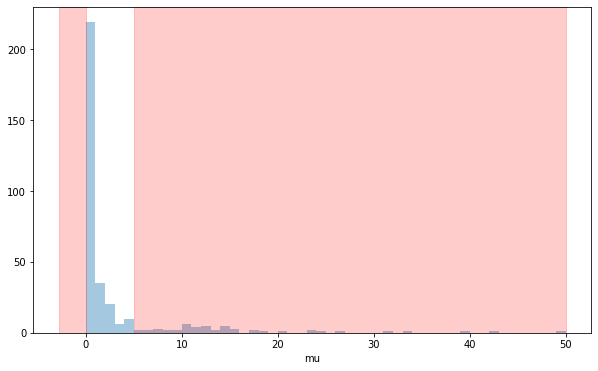

In [38]:
plt.figure(figsize = (10,6))
sns.distplot(df_new.mu, kde=False)
plt.axvspan(xmin = lower,xmax= df_new.mu.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_new.mu.max(),alpha=0.2, color='red')

In [39]:
df_new = df_new[(df_new['mu'] < upper) | (df_new['mu'] > lower)]
df_new.describe()

,mu,mw/k,Eg,fused len,side conj,xtal T,osc%,Vert_Phase_encoder,Additive_Type_encoder,Rsc
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,2.972529,14.778719,2.074605,3.658447,0.459950,30.059128,92.225959,0.247788,0.230088,1.575963
std,6.524360,16.353646,0.273700,1.255208,0.745525,31.599323,21.635212,0.613424,0.683822,1.431189
min,0.000050,0.180000,1.230000,1.000000,0.000000,25.000000,3.000000,0.000000,0.000000,0.000000
25%,0.095500,0.640000,2.074605,2.500000,0.000000,25.000000,100.000000,0.000000,0.000000,0.000000
50%,0.500000,14.737135,2.074605,3.662393,0.000000,25.000000,100.000000,0.000000,0.000000,1.508373
75%,2.050000,14.737135,2.074605,5.000000,0.461538,25.000000,100.000000,0.000000,0.000000,1.800000
max,50.000000,110.000000,3.800000,7.000000,4.000000,480.000000,100.000000,2.000000,4.000000,6.000000


outlier removal method #2

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='mu', ylabel='Density'>

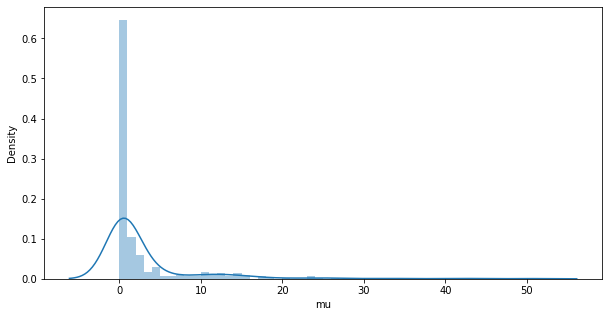

In [40]:
plt.figure(figsize = (10,5))
sns.distplot(df_new['mu'])

In [41]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

out_std(df_new,'mu')


The lower bound value is -16.600551729870052
The upper bound value is 22.545609871462975
Total number of outliers are 9


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



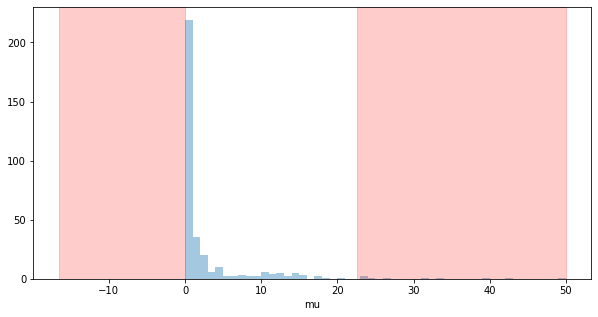

In [42]:
plt.figure(figsize = (10,5))
sns.distplot(df_new['mu'], kde=False)
plt.axvspan(xmin = lower,xmax= df_new['mu'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df_new['mu'].max(),alpha=0.2, color='red')

In [43]:
df_new = df_new[(df_new['mu'] < upper) | (df_new['mu'] > lower)]
df_new.describe()

,mu,mw/k,Eg,fused len,side conj,xtal T,osc%,Vert_Phase_encoder,Additive_Type_encoder,Rsc
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,2.972529,14.778719,2.074605,3.658447,0.459950,30.059128,92.225959,0.247788,0.230088,1.575963
std,6.524360,16.353646,0.273700,1.255208,0.745525,31.599323,21.635212,0.613424,0.683822,1.431189
min,0.000050,0.180000,1.230000,1.000000,0.000000,25.000000,3.000000,0.000000,0.000000,0.000000
25%,0.095500,0.640000,2.074605,2.500000,0.000000,25.000000,100.000000,0.000000,0.000000,0.000000
50%,0.500000,14.737135,2.074605,3.662393,0.000000,25.000000,100.000000,0.000000,0.000000,1.508373
75%,2.050000,14.737135,2.074605,5.000000,0.461538,25.000000,100.000000,0.000000,0.000000,1.800000
max,50.000000,110.000000,3.800000,7.000000,4.000000,480.000000,100.000000,2.000000,4.000000,6.000000


Z-Score method:
Z_score= (Xi - mean) / standard deviation
where Xi is a data point, 'mean' is the mean of all X and 'standard deviation' the standard deviation of all X.
An outlier is then a normalized data point which has an absolute value greater than Zthr. That is:
|Z_score| > Zthr
Commonly used Zthr values are 2.5, 3.0 and 3.5. Here we will be using 3.0

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='mu', ylabel='Density'>

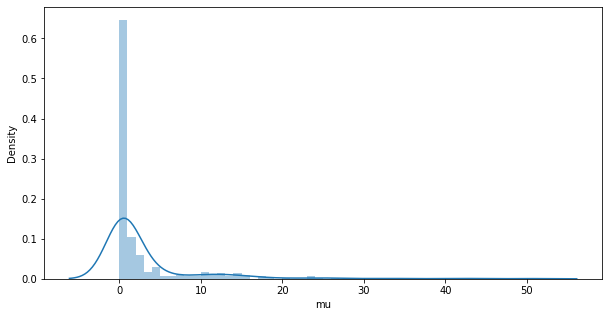

In [44]:
plt.figure(figsize = (10,5))
sns.distplot(df_new['mu'])

In [45]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))
out_zscore(df_new.mu)


Total number of outliers are 9


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



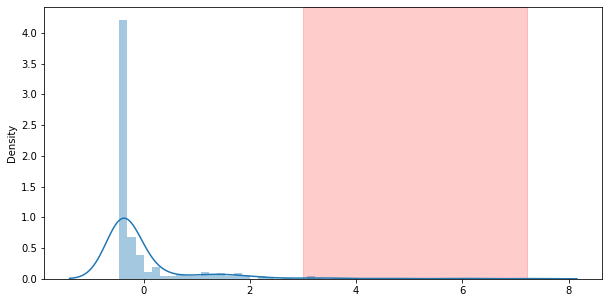

In [46]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

In [47]:
df_new = df_new[(df_new['mu'] < 3) | (df_new['mu'] > -3)]
df_new.describe()

,mu,mw/k,Eg,fused len,side conj,xtal T,osc%,Vert_Phase_encoder,Additive_Type_encoder,Rsc
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,2.972529,14.778719,2.074605,3.658447,0.459950,30.059128,92.225959,0.247788,0.230088,1.575963
std,6.524360,16.353646,0.273700,1.255208,0.745525,31.599323,21.635212,0.613424,0.683822,1.431189
min,0.000050,0.180000,1.230000,1.000000,0.000000,25.000000,3.000000,0.000000,0.000000,0.000000
25%,0.095500,0.640000,2.074605,2.500000,0.000000,25.000000,100.000000,0.000000,0.000000,0.000000
50%,0.500000,14.737135,2.074605,3.662393,0.000000,25.000000,100.000000,0.000000,0.000000,1.508373
75%,2.050000,14.737135,2.074605,5.000000,0.461538,25.000000,100.000000,0.000000,0.000000,1.800000
max,50.000000,110.000000,3.800000,7.000000,4.000000,480.000000,100.000000,2.000000,4.000000,6.000000


DBSCAN: Density-Based Spatial Clustering of Applications with Noise

In [48]:
b = df_new[['mu','Eg']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(b)
labels = db.labels_

In [49]:
pd.Series(labels).value_counts()


 0    329
-1     10
dtype: int64

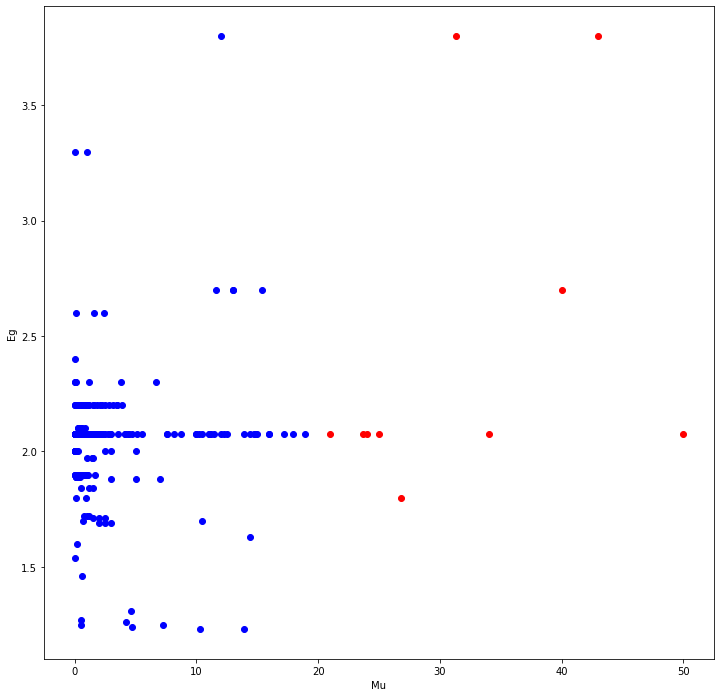

In [50]:
plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(b[:,0][sample_mask], b[:, 1][sample_mask], 'o', color=color);
plt.xlabel('Mu');
plt.ylabel('Eg');

Local Outlier Factor Method(LOF):
LOF uses density-based outlier detection to identify local outliers, points that are outliers with respect to their local neighborhood, rather than with respect to the global data distribution. The higher the LOF value for an observation, the more anomalous the observation.

In [51]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
a = df_new[['mu','Eg']].values
y_pred = clf.fit_predict(a)

plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(a[in_mask, 0], a[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(a[out_mask, 0], a[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Mu');
plt.ylabel('Eg');
plt.show()

# <font color='orange'><font size='7'>--Final Outlier Elemination --

In [ ]:
df_new = df_new[(df_new['mu'] >0.2)]
df_new.describe()

In [ ]:
df_new = df_new[(df_new['mu'] <12)]
df_new.describe()

# Ignore Warning

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Loss Calculation function

In [ ]:
def loss_res(name, model, X_train, y_train, X_test, y_test, graph = 1):
    print("Model performance for:", name)
    
    def calculate_loss(model, X, y):
        pred = model.predict(X)
        mae = mean_absolute_error(y, pred)
        mse = mean_squared_error(y, pred)
        r2 = r2_score(y, pred)
        return pred, mae, mse, r2
    
    y_train_pred, mae_train, mse_train, r2_train = calculate_loss(
        model, X_train, y_train)
    print(f'training MAE: {mae_train:.2e}')
    print(f'training MSE: {mse_train:.2e}')
    print(f'training R2: {r2_train:.3f}\n')
    
    y_test_pred, mae_test, mse_test, r2_test = calculate_loss(
        model, X_test, y_test)
    print(f'testing MAE: {mae_test:.2e}')
    print(f'testing MSE: {mse_test:.2e}')
    print(f'testing R2: {r2_test:.3f}')
    
    if graph == 0:
        return 
    elif graph == 1:
        plt.figure(figsize = (5,3), dpi = 100)
        plt.scatter(y_train, y_train_pred, s=15, alpha =0.3,label='train')
        plt.scatter(y_test, y_test_pred,s=15, alpha =0.3,label='test')
        plt.xlabel('True Target')
        plt.ylabel('Predicted Values')
        plt.legend(loc='best')
    
        plt.tight_layout()
        plt.show()  

# <font color='blue'>  Grid Search function

In [ ]:
def search_best_parameters(model, X, y, param_grid):
    gs = GridSearchCV(
        model, 
        param_grid, 
        cv = 5, 
        verbose = True,
        n_jobs = -1, 
        scoring = make_scorer(mean_squared_error, greater_is_better = False) 
    )
    
    res = gs.fit(X, y)
    print(f'{res.best_score_} with paramters of {res.best_params_}')
    print(res.best_params_)
    print(res.best_estimator_)       


# <font color='orange'><font size='7'>  Data split by Index or ...??

In [ ]:
train_raw = df_new[0:150].reset_index(drop=True)
test_raw = df_new[150:183].reset_index(drop=True)
test_raw.shape

# <font color='orange'><font size='7'>  Feature Selection

All_features = ['mw/k','Eg', 'fused len', 'side conj', 'xtal T', 'osc%', 
            'Vert_Phase_encoder','Additive_Type_encoder','Rsc']

In [ ]:
features = ['mw/k','Eg', 
            'Vert_Phase_encoder','Rsc']
target = 'mu'

X_train = train_raw[features]
y_train = train_raw[target]

X_test = test_raw[features]
y_test = test_raw[target]

# Import Libraries

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn import set_config
set_config(display='diagram')

# Fit data

In [ ]:
class Transformer(object):    
    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        df = pd.DataFrame()        
        for feature in list(X.columns):
            df[feature] = X[feature]
        
    def transform(self, X, y=None):
        df = pd.DataFrame()  
        for feature in list(X.columns):
            df[feature] = X[feature]        
        return df
        
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X, y)

In [ ]:
tf = Transformer()
tf.fit_transform(X_train)

# Linear/Polynomial Regression

In [ ]:
steps = [('tf', Transformer()),         
         ('poly', PolynomialFeatures()),
         ('Rescale', MinMaxScaler()),
         ('lr', LinearRegression())]

model_lr = Pipeline(steps)
model_lr = model_lr.fit(X_train, y_train)
loss_res('LinearRegression', model_lr, X_train, y_train, X_test, y_test, graph=1)

In [ ]:
param_grid = {
    'poly__degree': range(1, 10)
}
search_best_parameters(model_lr, X_train, y_train, param_grid)

In [ ]:
steps = [('tf', Transformer()),         
         ('poly', PolynomialFeatures(degree = 2)),
         ('Rescale', MinMaxScaler()),
         ('lr', LinearRegression())]

model_lr = Pipeline(steps)
model_lr = model_lr.fit(X_train, y_train)
loss_res('LinearRegression', model_lr, X_train, y_train, X_test, y_test, graph=1)

## <font color='blue'>  Linear Regression with Lasso

In [ ]:
steps = [('tf', Transformer()),         
         ('poly', PolynomialFeatures()),
         ('Rescale', MinMaxScaler()),
         ('lr_lasso', Lasso(max_iter = 1000000))]

model_lr_lasso = Pipeline(steps)
model_lr_lasso = model_lr_lasso.fit(X_train, y_train)
loss_res('Lasso', model_lr_lasso, X_train, y_train, X_test, y_test, graph=1)

In [ ]:
param_grid = {
    'poly__degree': range(2,6),
    'lr_lasso__alpha':[1, 3, 5, 7]
}
search_best_parameters(model_lr_lasso, X_train, y_train, param_grid)

In [ ]:
steps = [('tf', Transformer()),         
         ('poly', PolynomialFeatures(degree = 2)),
         ('Rescale', MinMaxScaler()),
         ('lr_lasso', Lasso(alpha = 2, max_iter = 1000000))]

model_lr_lasso = Pipeline(steps)
model_lr_lasso = model_lr_lasso.fit(X_train, y_train)
loss_res('Lasso', model_lr_lasso, X_train, y_train, X_test, y_test, graph=1)

# <font color='blue'>  Linear Regression with Ridge

In [ ]:
steps = [('tf', Transformer()),         
         ('poly', PolynomialFeatures()),
         ('Rescale', MinMaxScaler()),
         ('lr_Ridge', Ridge(max_iter = 1000000))]

model_lr_Ridge = Pipeline(steps)
model_lr_Ridge = model_lr_Ridge.fit(X_train, y_train)
loss_res('Ridge', model_lr_Ridge, X_train, y_train, X_test, y_test, graph=1)

In [ ]:
param_grid = {
    'poly__degree': range(1,6),
    'lr_Ridge__alpha': range(1, 5),
}
search_best_parameters(model_lr_Ridge, X_train, y_train, param_grid)

In [ ]:
steps = [('tf', Transformer()),         
         ('poly', PolynomialFeatures(degree=4)),
         ('Rescale', MinMaxScaler()),
         ('lr_Ridge', Ridge(alpha=2, max_iter=1000000))]

model_lr_Ridge = Pipeline(steps)
model_lr_Ridge = model_lr_Ridge.fit(X_train, y_train)
loss_res('Ridge', model_lr_Ridge, X_train, y_train, X_test, y_test, graph=1)

## <font color='blue'>  Tree Based Model

* ### <font color='blue'>  Random Froest Regression

In [ ]:
steps = [('tf', Transformer()),
         ('Rescale', MinMaxScaler()),
         ('rfr', RandomForestRegressor())]
model_rfr = Pipeline(steps)
model_rfr = model_rfr.fit(X_train, y_train)
loss_res("RandomForest", model_rfr, X_train, y_train, X_test, y_test, graph=1 )

In [ ]:
importances = model_rfr.steps[2][1].feature_importances_

In [ ]:
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
importance = model_rfr[2].feature_importances_
for i,v in enumerate(importance):    
    print('%s : %.5f'%(features[i], v))
plt.figure(figsize=(20,10))   
plt.bar([x for x in features], importance)


param_grid = {
    'rfr__max_depth': [3, 6, 9, 20, 50, 100],
    'rfr__min_samples_leaf': [1, 3, 5, 10, 20],
    'rfr__min_samples_split': [2, 3, 5, 8]    
}
search_best_parameters(model_rfr, X_train, y_train, param_grid)

In [ ]:
param_grid = {
    'rfr__max_depth': [3, 6, 9, 20],
    'rfr__min_samples_leaf': [1, 3, 5, 10, 20],
    'rfr__min_samples_split': [2, 3, 5, 8]    
}
search_best_parameters(model_rfr, X_train, y_train, param_grid)

In [ ]:
steps = [('tf', Transformer()),
         ('Rescale', MinMaxScaler()),
         ('rfr', RandomForestRegressor(max_depth = 3, min_samples_leaf = 20, min_samples_split = 5))]
model_rfr = Pipeline(steps)
model_rfr = model_rfr.fit(X_train, y_train)
loss_res("RandomForest", model_rfr, X_train, y_train, X_test, y_test, graph=1 )

In [ ]:
importance = model_rfr[2].feature_importances_
for i,v in enumerate(importance):    
    print('%s : %.5f'%(features[i], v))
plt.figure(figsize=(20,10))   
plt.bar([x for x in features], importance)


### <font color='blue'>  Random Froest Regression with Gradient Boosting

In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,    
}

steps = [('tf', Transformer()),         
         ('rescale', MinMaxScaler()),         
         ('gbr',GradientBoostingRegressor(**params))]
         
model_gbt = Pipeline(steps)
model_gbt = model_gbt.fit(X_train, y_train)
loss_res("GradientBoosting", model_gbt, X_train, y_train, X_test, y_test, graph=1 )

In [ ]:
importance = model_gbt[2].feature_importances_
for i,v in enumerate(importance):    
    print('%s : %.5f'%(features[i], v))
plt.figure(figsize=(20,10))   
plt.bar([x for x in features], importance)
plt.show()   

param_grid = {
    'gbr__max_depth': [3, 6, 9, 20, 50, 100],
    'gbr__min_samples_leaf': [1, 3, 5, 10, 20],
    'gbr__min_samples_split': [2, 3, 5, 8],    
    "gbr__learning_rate": [0.1, 1],
    "gbr__n_estimators": [10, 50, 100, 500],
}

search_best_parameters(model_gbt, X_train, y_train, param_grid)

In [ ]:
param_grid = {
    'gbr__max_depth': [3, 6, 9, 20],######
    'gbr__min_samples_leaf': [1, 3, 5, 10, 20],
    'gbr__min_samples_split': [2, 3, 5, 8],    
    "gbr__learning_rate": [0.1, 1],
    "gbr__n_estimators": [10, 50],######
}

search_best_parameters(model_gbt, X_train, y_train, param_grid)

In [ ]:
params = {
    "n_estimators": 50,
    "max_depth": 3,
    "min_samples_split": 3,
    "learning_rate": 0.1,  
    'min_samples_leaf' : 20,
}

steps = [('tf', Transformer()),         
         ('rescale', MinMaxScaler()),         
         ('gbr',GradientBoostingRegressor(**params))]
         
model_gbt = Pipeline(steps)
model_gbt = model_gbt.fit(X_train, y_train)
loss_res("GradientBoosting", model_gbt, X_train, y_train, X_test, y_test, graph=1 )

In [ ]:
importance = model_gbt[2].feature_importances_
for i,v in enumerate(importance):    
    print('%s : %.5f'%(features[i], v))
plt.figure(figsize=(20,10))   
plt.bar([x for x in features], importance)
plt.show()   

### <font color='blue'>  Random Froest Regression with Xgboost

In [ ]:
steps = [('tf', Transformer()),         
         ('rescale', MinMaxScaler()),         
         ('xgbr',XGBRegressor())]
         
model_xgbt = Pipeline(steps)
model_xgbt = model_xgbt.fit(X_train, y_train)
loss_res("Xgboost", model_xgbt, X_train, y_train, X_test, y_test, graph=1 )

param_grid = {
    'xgbr__max_depth': [3, 6, 9, 20, 50],
    "xgbr__min_child_weight":[3, 5, 7],
    "xgbr__gamma": [0.0, 0.1, 0.2, 0.3],       
    "xgbr__learning_rate": [0.05, 0.1],
    "xgbr__n_estimators": [10, 50, 100],    
}

search_best_parameters(model_xgbt, X_train, y_train, param_grid)

In [ ]:
param_grid = {
    'xgbr__max_depth': [3, 6, 9, 20],#########
    "xgbr__min_child_weight":[3, 5, 7],
    "xgbr__gamma": [0.0, 0.1, 0.2, 0.3],       
    "xgbr__learning_rate": [0.05, 0.1],
    "xgbr__n_estimators": [10, 50],    ##########
}

search_best_parameters(model_xgbt, X_train, y_train, param_grid)

In [ ]:
params ={
    'gamma': 0.0, 
    'learning_rate': 0.05, 
    'max_depth': 3, 
    'min_child_weight': 7, 
    'n_estimators': 100
}

In [ ]:
steps = [('tf', Transformer()),         
         ('rescale', MinMaxScaler()),         
         ('xgbr',XGBRegressor(**params))]
         
model_xgbt = Pipeline(steps)
model_xgbt = model_xgbt.fit(X_train, y_train)
loss_res("Xgboost", model_xgbt, X_train, y_train, X_test, y_test, graph=1 )

importance = model_gbt[2].feature_importances_
for i,v in enumerate(importance):    
    print('%s : %.5f'%(features[i], v))
plt.figure(figsize=(20,10))   
plt.bar([x for x in features], importance)
plt.show() 

In [ ]:
importance = model_xgbt[2].feature_importances_

for i,v in enumerate(importance):    
    print('%s : %.5f'%(features[i], v))
plt.figure(figsize=(20,10))   
plt.bar([x for x in features], importance)
plt.show()   

<font color='blue'><font size = '5'> **Table of Loss Calculation for Each Model**

In [ ]:
Model_loss_comparsion = pd.DataFrame()

Model_loss_comparsion.index = ['Linear_Regression', 'Lasso', 'Ridge', 'Random_Forest', 'Gradient_Boosting', 'Xgboost']
Model_loss_comparsion['train_loss_R2']= [,,]
Model_loss_comparsion['test_loss_R2']= [,,]

Model_loss_comparsion

#  <font color='blue'> 4. Classification

In [ ]:
plt.hist(mu)
plt.hist(df_new.mu)

In [ ]:
fig = plt.figure(figsize = (15,20)) 
ax = fig.gca() 
df_new.hist(ax = ax)
